In [1]:
import pandas as pd
from sklearn.metrics import roc_auc_score, average_precision_score, matthews_corrcoef
import seaborn as sns
import scikit_posthocs as sp
import matplotlib.pyplot as plt

Read the data from the 10 rounds of ChemProp cross validation

In [2]:
def get_chemprop_data(prefix, task_type):
    threshold = 0.5
    result_list = []
    for i in range(0,10):
        dirname = f"data/BSEP{i:03d}"
        df_test = pd.read_csv(f"{dirname}/{prefix}_test_{i:03d}.csv")
        df_test.BSEP = df_test.BSEP.astype(int)
        df_pred = pd.read_csv(f"{dirname}/{prefix}_result_{task_type}/test_preds.csv")  
        roc_auc = roc_auc_score(df_test.BSEP, df_pred.BSEP)
        pr_auc = average_precision_score(df_test.BSEP, df_pred.BSEP)
        hard_preds = [1 if p > threshold else 0 for p in df_pred.BSEP]
        mcc = matthews_corrcoef(df_test.BSEP, hard_preds)
        result_list.append([prefix, dirname,task_type,roc_auc, pr_auc, mcc])
        result_df = pd.DataFrame(result_list,columns=["split","dataset","task","roc_auc","pr_auc","mcc"])
    return result_df

Compile the data into a dataframe

In [3]:
df_list = []
for split in ["random","scaffold"]:
    for task in ["ST","MT"]:
        df_list.append(get_chemprop_data(split,task))
cp_df = pd.concat(df_list)
cp_df['method'] = 'chemprop'

Read the LightGBM results

In [9]:
lgbm_df = pd.read_csv("lgbm_result.csv")
lgbm_df['method'] = "lgbm"

In [10]:
lgbm_df

,split,dataset,task,roc_auc,pr_auc,mcc,method
0,random,data/BSEP000,ST,0.855750,0.636497,0.509922,lgbm
1,scaffold,data/BSEP000,ST,0.898810,0.663441,0.523241,lgbm
2,random,data/BSEP001,ST,0.905172,0.720933,0.568089,lgbm
3,scaffold,data/BSEP001,ST,0.811005,0.524939,0.400543,lgbm
4,random,data/BSEP002,ST,0.842458,0.657107,0.537111,lgbm
5,scaffold,data/BSEP002,ST,0.749427,0.555806,0.322722,lgbm
6,random,data/BSEP003,ST,0.826308,0.726316,0.567030,lgbm
7,scaffold,data/BSEP003,ST,0.805821,0.633459,0.559241,lgbm
8,random,data/BSEP004,ST,0.901501,0.667250,0.497179,lgbm
9,scaffold,data/BSEP004,ST,0.871777,0.631353,0.550296,lgbm


Combine the ChemProp and LightGBM results into one dataframe

In [5]:
combo_df = pd.concat([cp_df,lgbm_df])
combo_df['desc'] = combo_df.method + "_" + combo_df.split + "_" + combo_df.task

Take a quick look at the data

In [8]:
demo_df = combo_df.reset_index()
demo_df.rename(columns={"index" : "cv_fold", "desc" : "method"})

,cv_fold,split,dataset,task,roc_auc,pr_auc,mcc,method,method
0,0,random,data/BSEP000,ST,0.868376,0.613064,0.508400,chemprop,chemprop_random_ST
1,1,random,data/BSEP001,ST,0.908547,0.628722,0.491051,chemprop,chemprop_random_ST
2,2,random,data/BSEP002,ST,0.896581,0.612722,0.414027,chemprop,chemprop_random_ST
3,3,random,data/BSEP003,ST,0.952137,0.697986,0.548651,chemprop,chemprop_random_ST
4,4,random,data/BSEP004,ST,0.953846,0.781441,0.654144,chemprop,chemprop_random_ST
5,5,random,data/BSEP005,ST,0.894872,0.600121,0.491051,chemprop,chemprop_random_ST
6,6,random,data/BSEP006,ST,0.884615,0.590659,0.473086,chemprop,chemprop_random_ST
7,7,random,data/BSEP007,ST,0.896581,0.693173,0.539768,chemprop,chemprop_random_ST
8,8,random,data/BSEP008,ST,0.902564,0.566657,0.441667,chemprop,chemprop_random_ST
9,9,random,data/BSEP009,ST,0.878632,0.512415,0.386787,chemprop,chemprop_random_ST


Split the random and scaffold cross validation datasets into separate dataframes.

In [7]:
df_random = combo_df.query("split == 'random'")
df_scaffold = combo_df.query("split == 'scaffold'")

A function to plot three boxplots side by side.  

In [8]:
def make_boxplots(df):
    sns.set_context('notebook')
    sns.set(rc={'figure.figsize':(4,3)},font_scale=1.5)
    sns.set_style('whitegrid')
    figure, axes = plt.subplots(1, 3, sharex=False, sharey=True, figsize=(16,8))
    
    for i,stat in enumerate(["roc_auc", "pr_auc", "mcc"]):
        ax = sns.boxplot(x=stat,y="desc",ax=axes[i],data=df)
        title = stat.replace("_"," ").upper()
        ax.set_title(title)
        ax.set_ylabel("")
        ax.set_xlabel(title)
        ax.set_xlim(0,1)

A function to plot three barplots side by side. 

In [9]:
def make_barplots(df):
    sns.set(rc={'figure.figsize':(4,3)},font_scale=1.5)
    figure, axes = plt.subplots(1, 3, sharex=False, sharey=True, figsize=(16,8))
    
    for i,stat in enumerate(["roc_auc", "pr_auc", "mcc"]):
        ax = sns.barplot(x=stat,y="desc",ax=axes[i],data=df)
        title = stat.replace("_"," ").upper()
        ax.set_title(title)
        ax.set_ylabel("")
        ax.set_xlabel(title)
        ax.set_xlim(0,1)

A function to plot three sign plots side by side.

In [10]:
def make_sign_plots(df):
    heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': True, 'square': True}
    sns.set(rc={'figure.figsize':(4,3)},font_scale=1.5)
    figure, axes = plt.subplots(1, 3, sharex=False, sharey=True, figsize=(16,8))
    
    for i,stat in enumerate(["roc_auc", "pr_auc", "mcc"]):
        pc = sp.posthoc_conover_friedman(df,y_col=stat,group_col="desc",block_col="dataset",p_adjust="holm",melted=True)
        sub_ax, sub_c = sp.sign_plot(pc, **heatmap_args, ax=axes[i])
        sub_ax.set_title(stat.replace("_"," ").upper())

In [45]:
def make_critical_difference_diagrams(df):
    figure, axes = plt.subplots(3, 1, sharex=True, sharey=False, figsize=(16,8))
    for i,stat in enumerate(["roc_auc","pr_auc","mcc"]):
        avg_rank = df.groupby("dataset")[stat].rank(pct=True).groupby(df.desc).mean()
        pc = sp.posthoc_conover_friedman(df,y_col=stat,group_col="desc",block_col="dataset",p_adjust="holm",melted=True)
        sp.critical_difference_diagram(avg_rank, pc,ax=axes[i]);
        axes[i].set_title(stat.upper().replace("_"," "))
    plt.tight_layout()

Boxplots for the random split cross validation subset. 

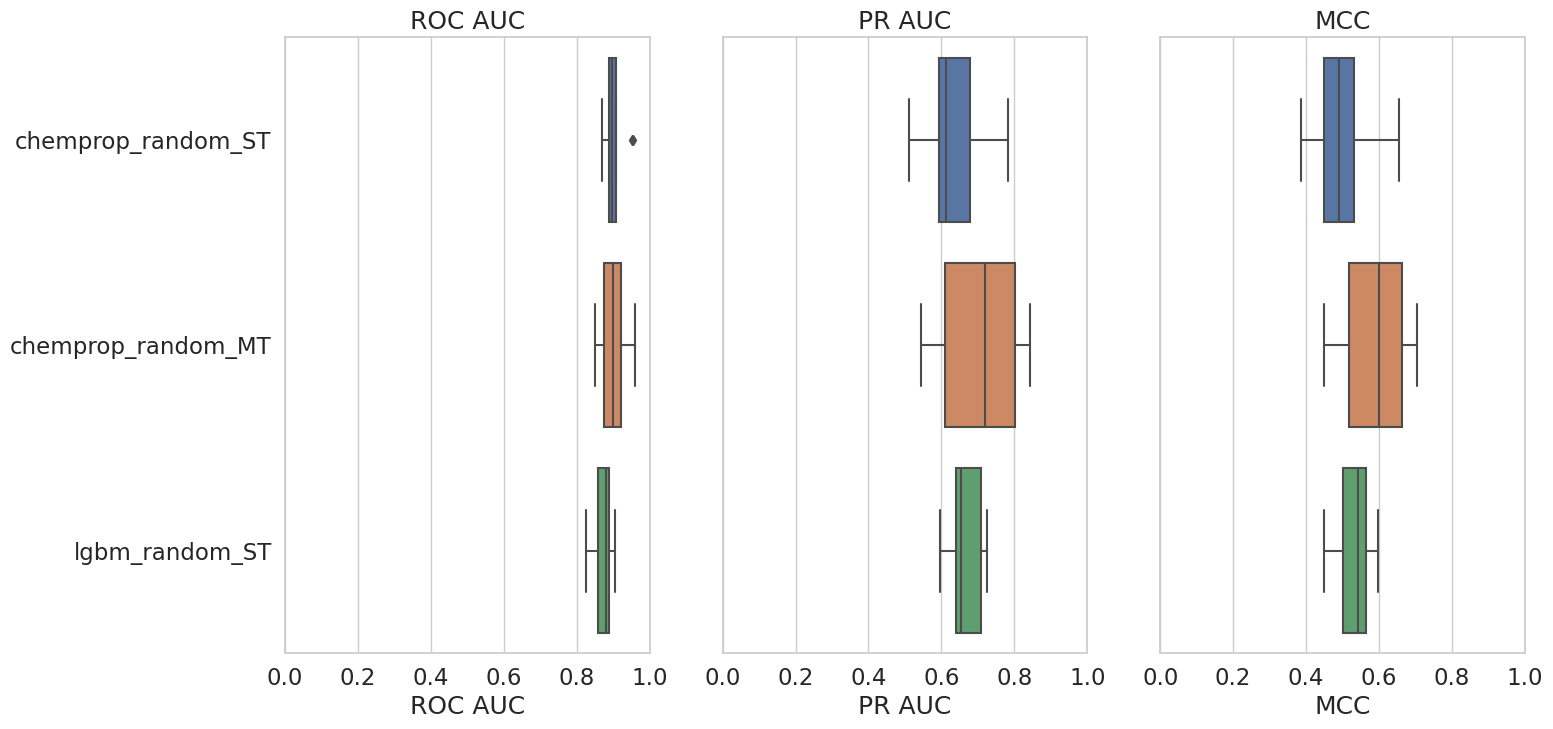

In [11]:
make_boxplots(df_random)

Sign plots of the random split cross validation subset 

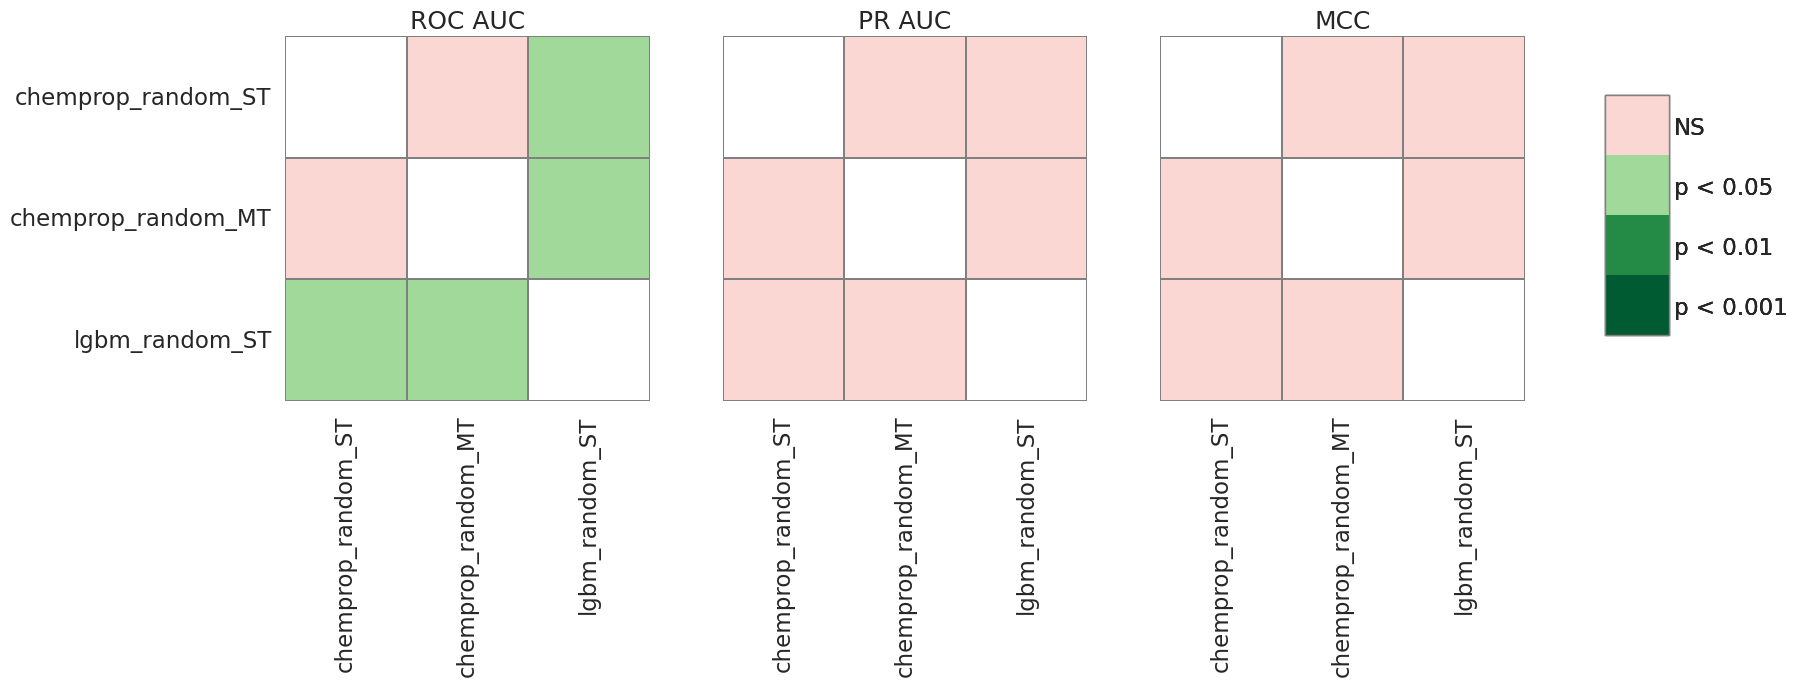

In [12]:
make_sign_plots(df_random)

Box plots of the scaffold split cross validation subset

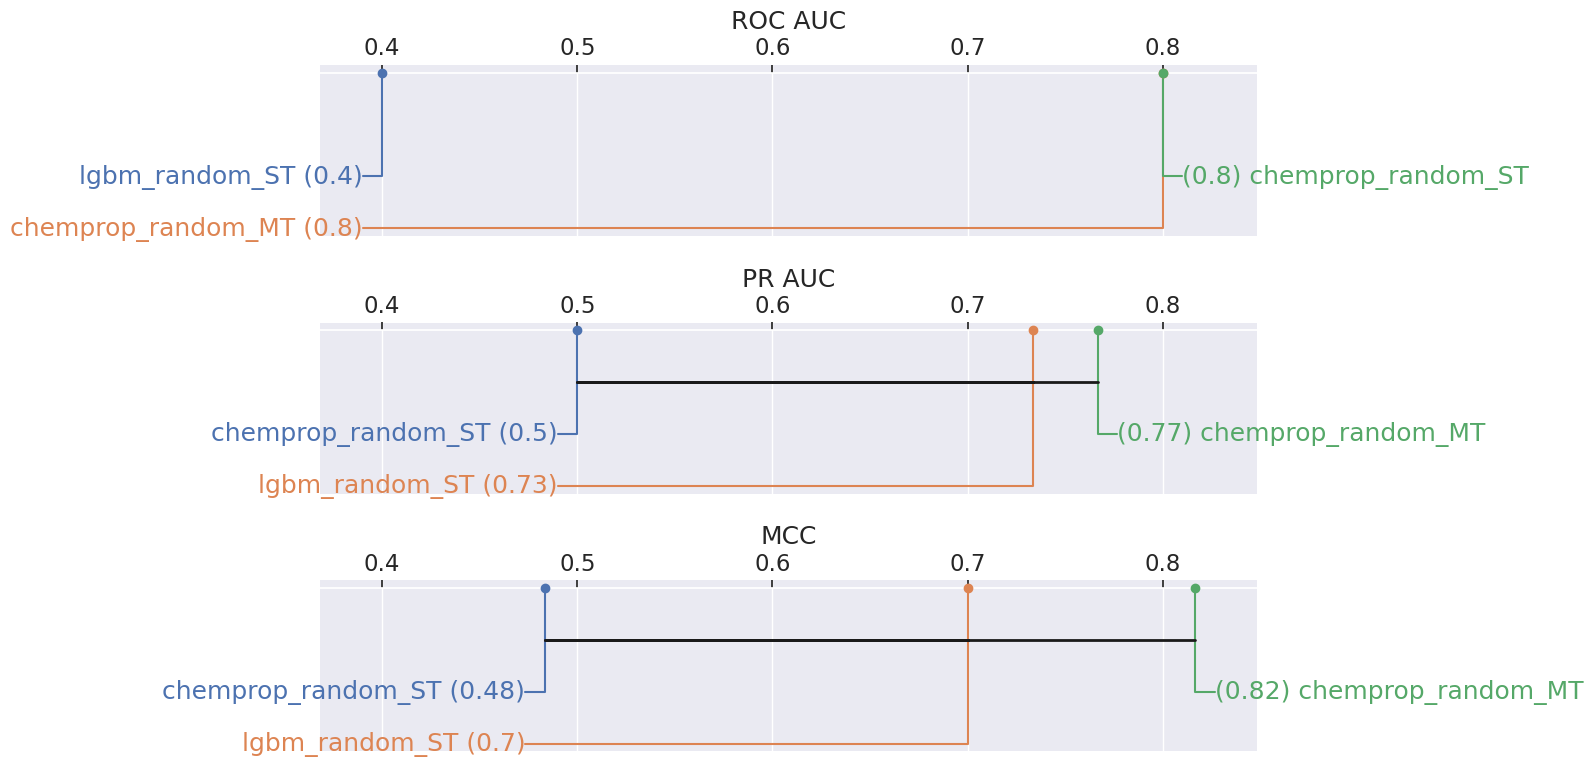

In [48]:
make_critical_difference_diagrams(df_random)

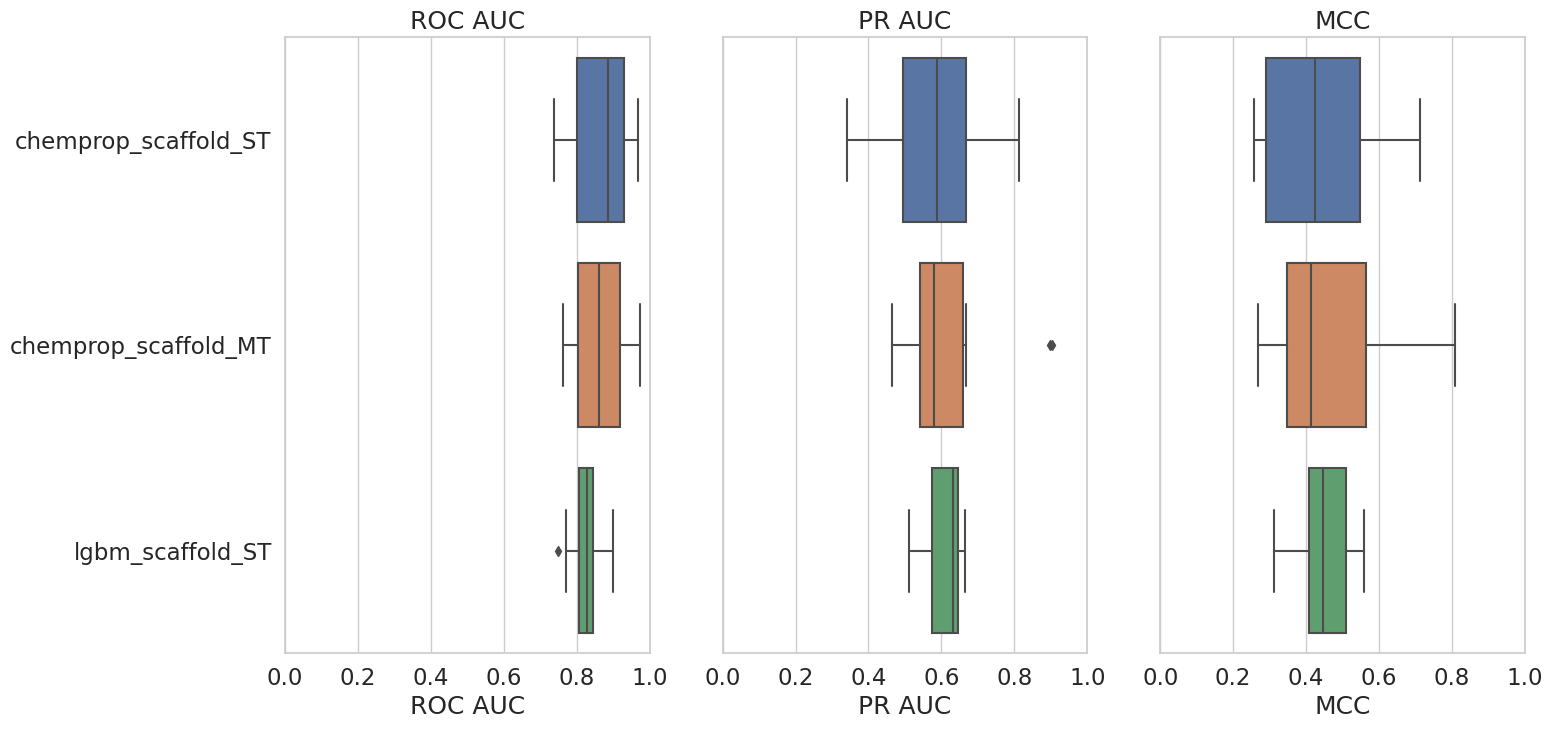

In [13]:
make_boxplots(df_scaffold)

Sign plots of the scaffold split cross validation subset

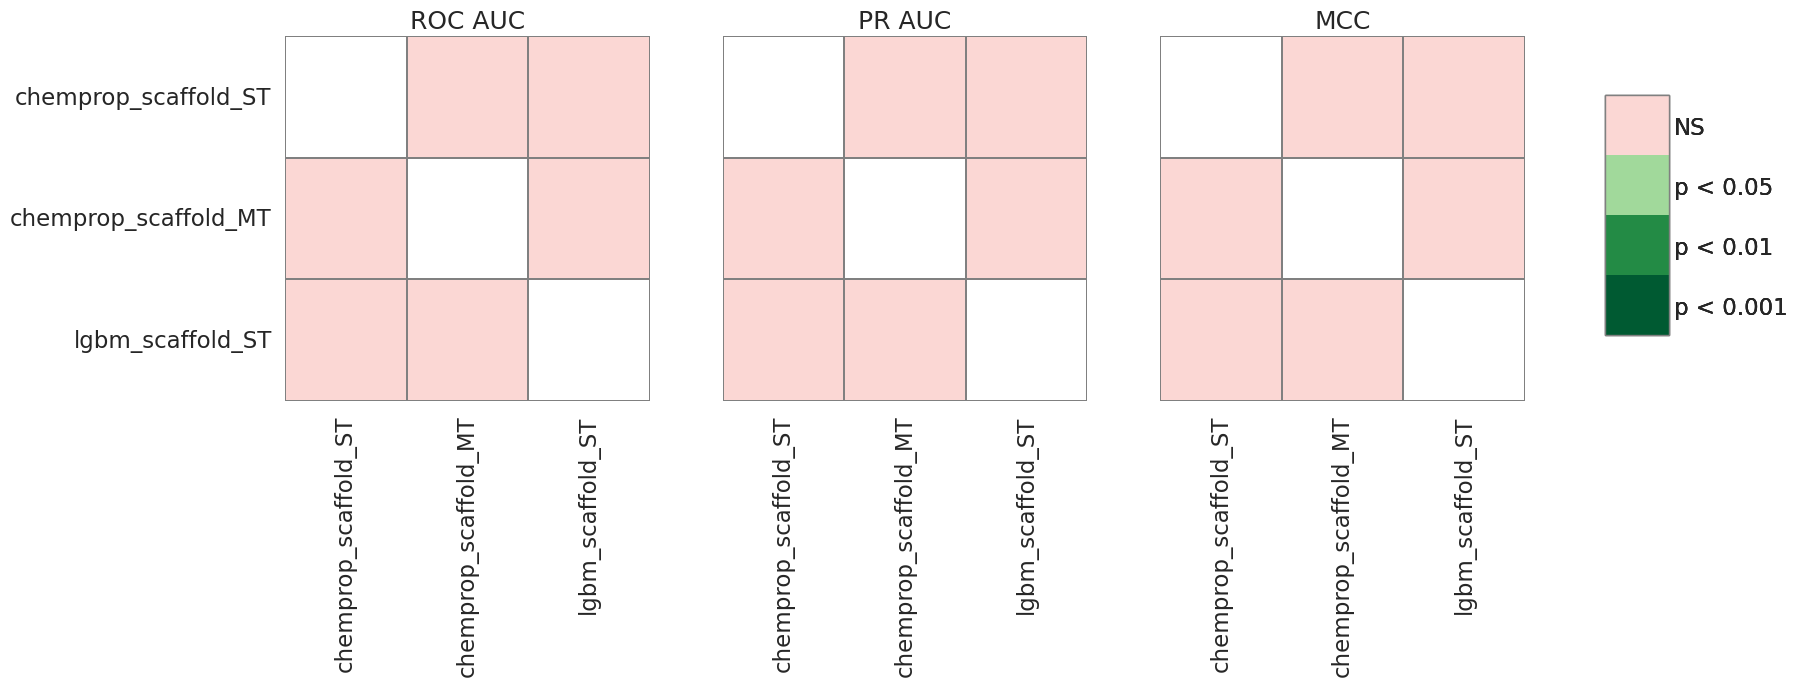

In [14]:
make_sign_plots(df_scaffold)

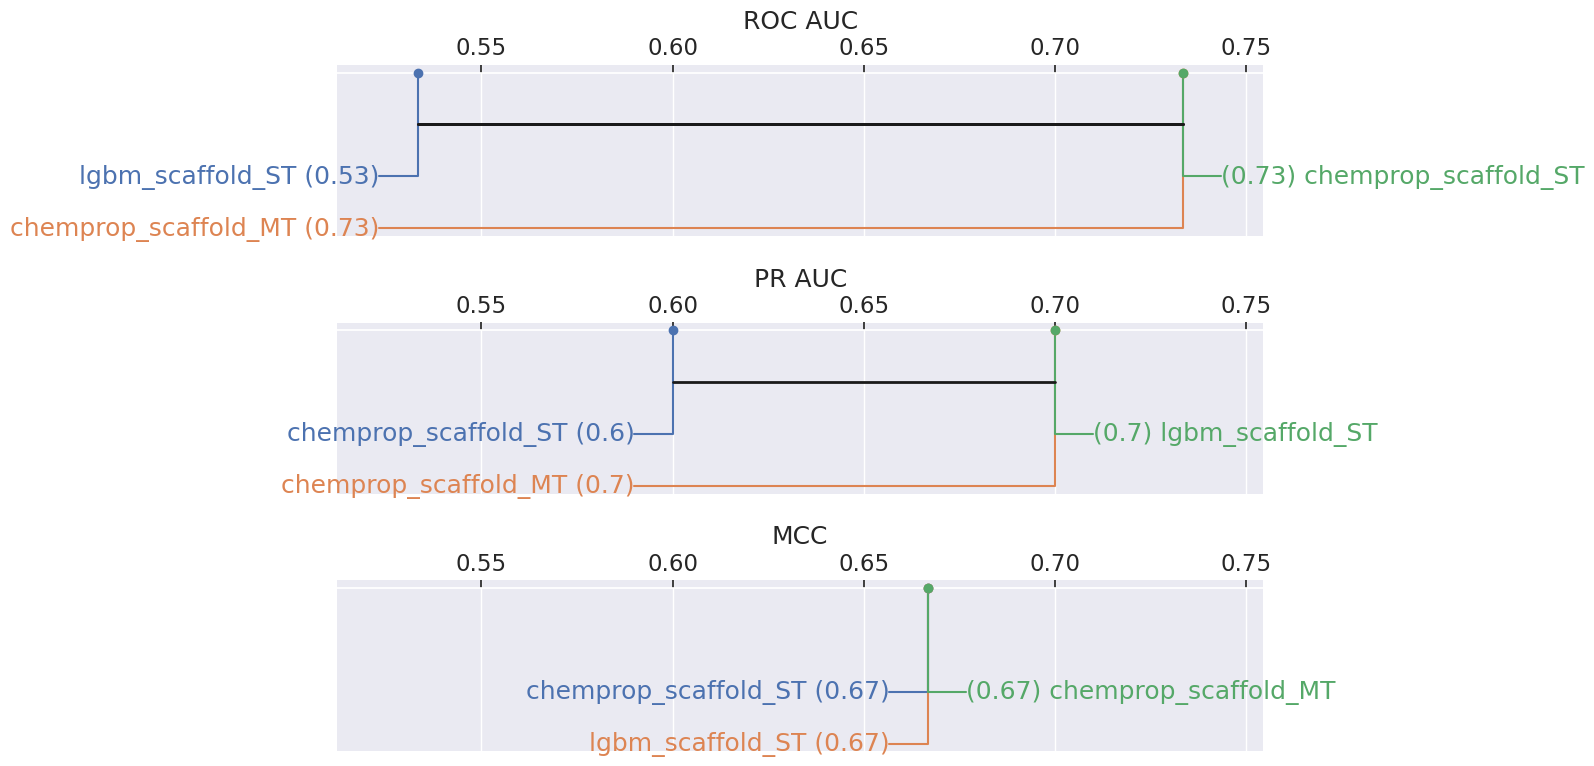

In [47]:
make_critical_difference_diagrams(df_scaffold)